# Week 11 tutorial - Unsupervised Learning


The materials used in this tutorial are based on the applied exercises provided in the book "An Introduction to Statistical Learning with Applications in R" (ISLR). We are trying to demonstrate how to implement the following unsupervised methods:
* Hierarchical clustering
* PCA
* K-means

Even though you will learn how to use the above methods, it is still worth trying by yourself
* Sections 10.4, 10.5 and 10.6 in the textbook
    

# 1. Hierarchical clustering
In this exercise, we are going to perform hierarchical clustering on the states of 
the <b><a href="https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html">USArrests</a></b> data. It contains statistics in arrests in US states, i.e., the number of arrests per 100,000 residents for each of the following crimes: Assault, Murder and Rape. The textbook shows how we can use PCA to visualize the 50 states, and reveal some interesting patterns. Here, you are going to use a hierarchical clustering algorithm to find some interesting subgroups of states in regard to the crime statistics.

In [17]:
library(ISLR)
set.seed(2)

## 1.1  Using hierarchical clustering with complete linkage and Euclidean distance to cluster the states.

The method you are going to use to compute the inter-cluster dissimilarity is complete linkage (please refer to page 395 in the text book). The similarity measure is the Euclidean distance between two feature vectors. The R function used here is <b><i><a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/hclust.html">hclust()</a></i></b>.


In [18]:
help(hclust)

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


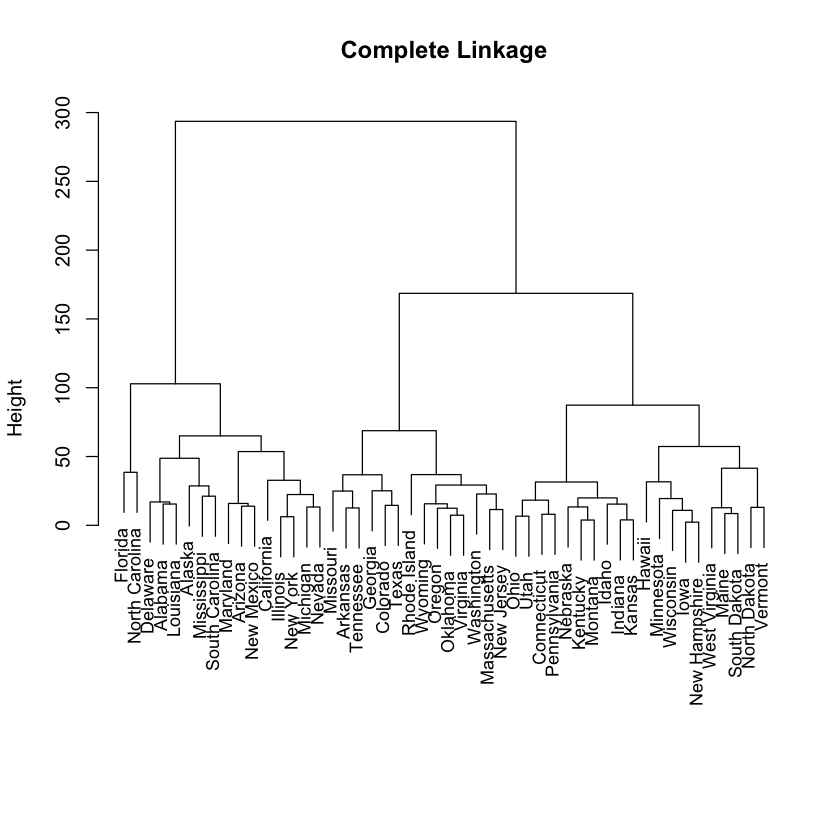

In [19]:
hc.complete = hclust(dist(USArrests), method="complete")
plot(hc.complete, main="Complete Linkage", xlab="", sub="", cex=0.9)

The plot shows a Dendrogram, which looks like a tree. The leave nodes are the data points, i.e., the 50 states. The hierarchical algorithm starts from the leaves by merging together two leave nodes that are very similar to each other. The merging of clusters/nodes will proceed iteratively from the bottom to the top.  

## 1.2 Cut the dendrogram at a height that results in three distinct clusters. 

In this exercise, we are interested in put all the states into three clusters, and print out which states belong to which clusters. To do this, you can use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cutree.html">cutree()</a> function. You need to set the desired number of groups <font color='brown'>k</font> to 3.


In [20]:
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

The output from the above code shows which cluster each state has been assigned to. For example, <font color="brown">California</font> is assigned to cluster number 1. You can also visualize the group in the dendrogram as follows:

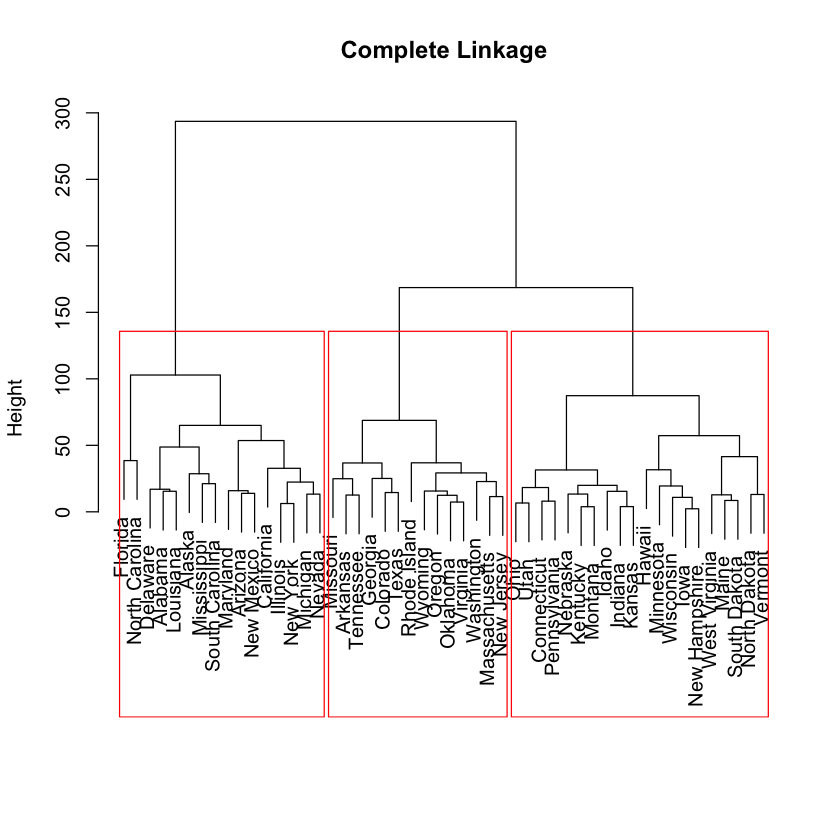

In [21]:
plot(hc.complete, main="Complete Linkage", xlab="", sub="")
rect.hclust(hc.complete, k=3, border="red")

Let's look at the dendrogram together with Figure 10.1 in the text book. The analysis under figure 10.1 says that the first component roughly corresponds to a measure of overall rates of serious crimes. Figure 10.1 shows that states like <font color='brown'>California</font>, <font color='brown'>Nevada</font>, <font color='brown'>Florida</font>, <font color='brown'>Maryland</font>, <font color='brown'>Alaska</font> have high overall crime rate, and the dendrogram shows that they are all put into the same cluster.

## 1.3 Scale variables before Hierarchical clustering. 
We have discussed how variable scale can affect both PCA and clustering algorithms. In terms of clustering algorithms, different variable scales could have a significant effect on computing the similarities between clusters or between data points. In this exercise, you are going to repeat what you have done in Exercises 1.1 and 1.2 by standardizing the data values, which can be done with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/base/html/scale.html"> scale()</a> function built-in R. 

In [22]:
summary(USArrests)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

Use the <font color="blue">apply()</font> function to compute the standard deviation of each variable.

In [23]:
apply(USArrests, 2, sd)

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

The summary shows that variable values are in different scale. You should consider standardizing the values so that after standardizing the variables to have standard deviation one. 

In [24]:
sd_usarrests = scale(USArrests, center = TRUE, scale = TRUE)
summary(sd_usarrests)

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

You can also check the standard deviation of each variable after standardization.

In [25]:
apply(sd_usarrests, 2, sd)

Murder  Assault UrbanPop     Rape 
       1        1        1        1

Now, use the hclust function to build the hierarchical clustering:

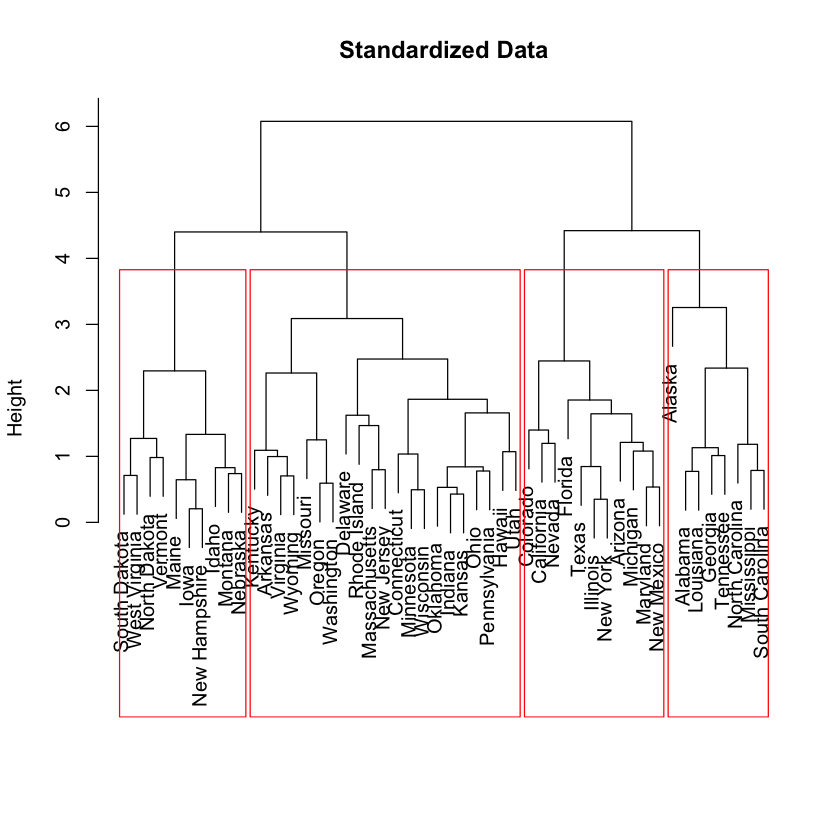

In [26]:
std_complete = hclust(dist(sd_usarrests), method="complete")
plot(std_complete, main="Standardized Data", xlab="", sub="")
rect.hclust(std_complete, k=4, border="red")

Now, if you compare the above dendrogram with the one generated in Exercise 1.1, the two three structures are different. It looks like we have four clusters, which is more fine-grained clustering of the 50 states. Again, let's jointly look at Figure 10.1 and the dendrogram generated above. We will find that the states in the first cluster from the right are very close to each other in Figure 10.1. A similar pattern can also be observed in the second cluster from the right. More discussion about what effect does scaling the variables have on the hierarchical clustering obtained can be found on page 398 in the textbook.

# PCA and K-means clustering

In this exercise, you will generate simulated data, and then perform PCA and K-means clustering on the data. Firstly, generate a simulated data set with 20 observations in each of three classes (i.e., 60 observations in total), and 50 variables. There are a number of functions in R that you can use to generate data. One example is the <font color="blue">rnorm()</font> function; <font color="blue">runif()</font> is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [27]:
#K = 3  # the number of classes
set.seed(3)
n = 20 # the number of samples per class
p = 50 # the number of variables 
# Create data for class 1: 
X_1 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_1[row,] = X_1[row,] + rep( 1, p ) 
}
# Create data for class 2: 
X_2 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_2[row,] = X_2[row,] + rep( -1, p ) 
}
# Create data for class 3:
X_3 = matrix( rnorm(n*p), nrow=n, ncol=p )
for( row in 1:n ){
  X_3[row,] = X_3[row,] + c( rep( +1, p/2 ), rep( -1, p/2 ) ) 
}
X = rbind( X_1, X_2, X_3 )
labels = c( rep(1,n), rep(2,n), rep(3,n))

## 2.1 PCA 
In this exercise, you will perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

The <font color = "blue">prcomp</font> function returns an object of class prcomp, which have some methods available. The <font color="blue">print</font> method returns the standard deviation of each of the PCs, and their loadings, which are the coefficients of the linear combinations of the variables. 

In [28]:
pca.out = prcomp(X, center = TRUE, scale. = TRUE)
print(pca.out)

Standard deviations:
 [1] 4.33502890 2.59514277 1.30024697 1.26057788 1.19603580 1.17248229
 [7] 1.10266405 1.05552583 1.04027515 1.01931856 1.00762718 0.98354299
[13] 0.95627298 0.93894679 0.90331237 0.87709115 0.85889367 0.82959289
[19] 0.80109984 0.76078811 0.73172281 0.71007580 0.69811550 0.68310501
[25] 0.64600296 0.63903298 0.59052766 0.57505517 0.53186358 0.50490185
[31] 0.46896003 0.46511752 0.44535289 0.42391465 0.38257680 0.36607814
[37] 0.34619201 0.33006358 0.31018482 0.29307810 0.28207284 0.25501574
[43] 0.24484974 0.21568312 0.19359026 0.17562939 0.15567346 0.14423331
[49] 0.11217363 0.08397205

Rotation:
             PC1         PC2          PC3         PC4          PC5          PC6
 [1,] 0.14304575  0.15926940  0.056105247 -0.17021551  0.090392552 -0.163571714
 [2,] 0.12658966  0.13231809 -0.202908312  0.02883118  0.264129101 -0.085498929
 [3,] 0.10190969  0.12703131  0.152629413  0.35893330  0.094434065 -0.010357768
 [4,] 0.16542900  0.10446320 -0.023355921  0.17692839

Since scale (i.e., skewness and the magnitude) of the variables influence the resulting PCs, it is good practice to apply variable standardization, center and scale the variables prior to the application of PCA.

The <font color="blue">plot</font> method returns a plot of the variances (y-axis) associated with the PCs (x-axis). The Figure below is useful to decide how many PCs to retain for further analysis. It shows that the first 2 PCs explain most of the variability in the data

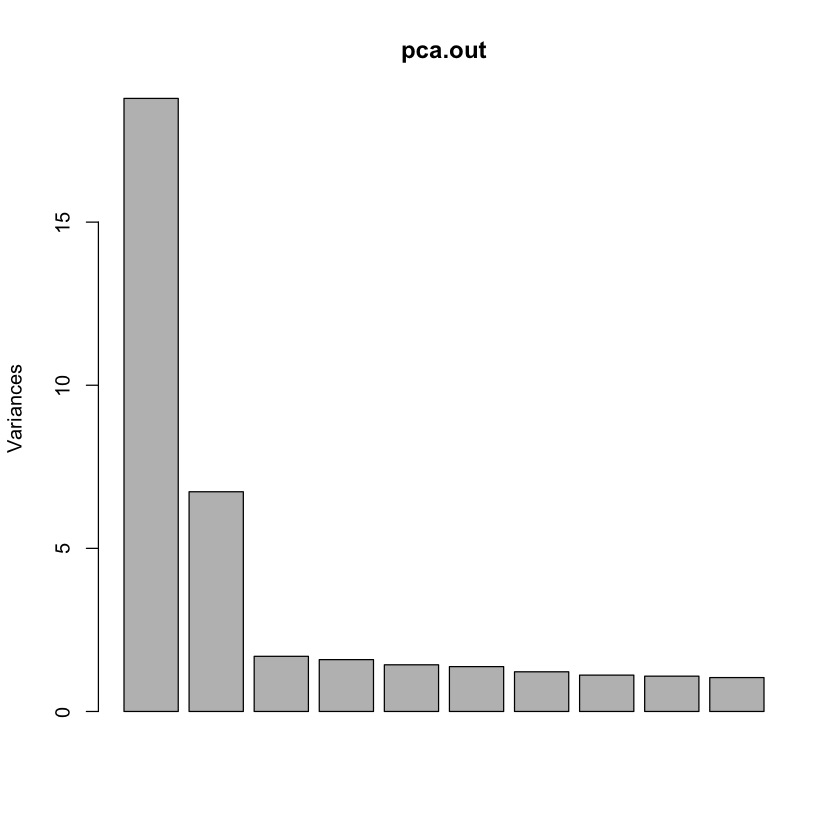

In [29]:
plot(pca.out)

The summary method describe the importance of the PCs. The first row describe again the standard deviation associated with each PC. The second row shows the proportion of the variance in the data explained by each component while the third row describe the cumulative proportion of explained variance.

In [30]:
summary(pca.out)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     4.3350 2.5951 1.30025 1.26058 1.19604 1.17248 1.10266
Proportion of Variance 0.3759 0.1347 0.03381 0.03178 0.02861 0.02749 0.02432
Cumulative Proportion  0.3759 0.5105 0.54436 0.57614 0.60475 0.63224 0.65656
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.05553 1.04028 1.01932 1.00763 0.98354 0.95627 0.93895
Proportion of Variance 0.02228 0.02164 0.02078 0.02031 0.01935 0.01829 0.01763
Cumulative Proportion  0.67884 0.70049 0.72127 0.74157 0.76092 0.77921 0.79684
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.90331 0.87709 0.85889 0.82959 0.80110 0.76079 0.73172
Proportion of Variance 0.01632 0.01539 0.01475 0.01376 0.01284 0.01158 0.01071
Cumulative Proportion  0.81316 0.82855 0.84330 0.85707 0.86990 0.88148 0.89219
                          PC22    

Now, plot the first two PCs.

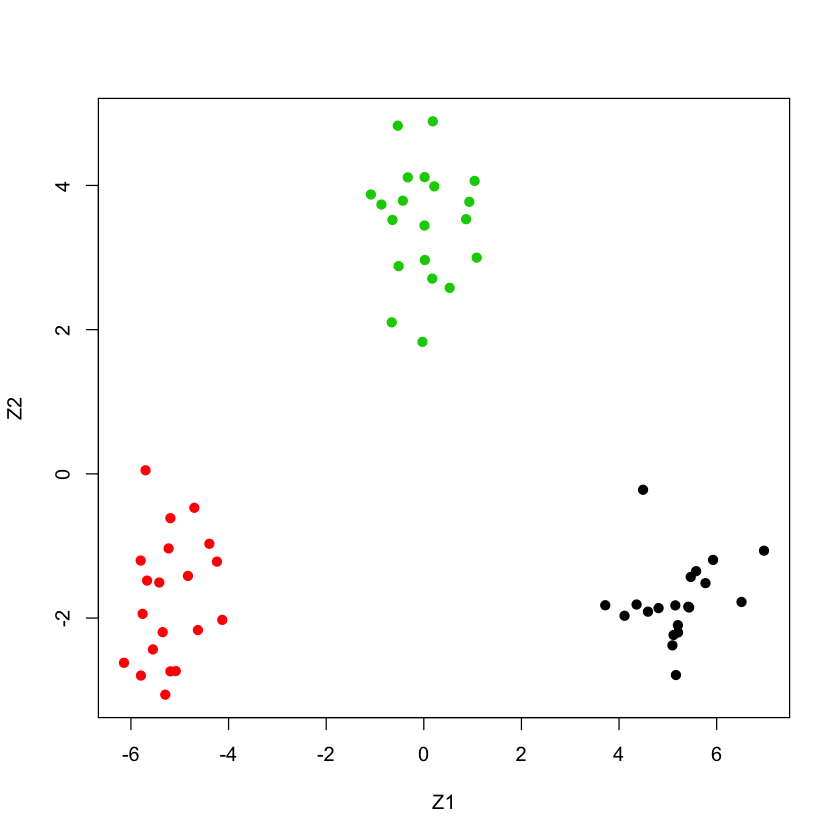

In [31]:
plot(pca.out$x[,1:2], col=labels, xlab="Z1", ylab="Z2", pch=19) 

The plot shows that the three classes appear well separated. We can move to the next exercise.

## 2.2 Perform K-means clustering of the observations with K = 3.

How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the <font color="blue">table()</font> function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [32]:
kmean.out = kmeans( X, centers=3, nstart=50 )
table(kmean.out$cluster, labels )

   labels
     1  2  3
  1  0 20  0
  2 20  0  0
  3  0  0 20

The table shows that the k-mean clustering algorithm has successfully identified the three class.

In [33]:
kmean.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Now, you can try K-means clustering with K = 2. Describe your results.

In [34]:
kmean.out.2 = kmeans( X, centers=2, nstart=50 )
kmean.out.2$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

Comparing the cluster outputs, you will find points in two classes are merged into one cluster. 

Then, perform K-means clustering with K = 4, and describe your results.

In [35]:
kmean.out.4 = kmeans( X, centers=4, nstart=50 )
kmean.out.4$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 4 4 4 4 2 2 4 4 4 4 4 2 4 2 4 4 2 4 2

The output clearly indicates that points in one class has been split into two clusters.

## 2.3 Now perform K-means clustering with K = 3 on the first two principal component score vectors. 
In this exercise, instead of running <a><font color="blue">kmeans</font></a> on the raw data, you will perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.


In [36]:
kmean.out.pca = kmeans(pca.out$x[,1:2], centers=3, nstart=50 )
kmean.out.pca$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [37]:
table(kmean.out.pca$cluster,labels)

   labels
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

The outputs above show a perfect match between clusters and classes.

## 2.4 Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [38]:
kmean.out.scale = kmeans(scale(X), 3, nstart=50)
kmean.out.scale$cluster
table(kmean.out.scale$cluster,labels)

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

   labels
     1  2  3
  1  0  0 20
  2 20  0  0
  3  0 20  0

# More reference reading materials
* <a href="http://www.statmethods.net/advstats/cluster.html">Cluster Analysis</a> provided on the Quick-R website